In [ ]:
#pip install PILLOW

In [7]:
from PIL import Image

# Classes are a way of combining information and behavior.

# Here is what a HouseForSale class looks like in code:

class HouseForSale:
    def __init__(self, id, price, days_on_market, image):
        self.id = id
        self.price = price
        self.days_on_market = days_on_market
        self.image = image

    def present(self):
        # Present the house with details
        print(self.id, '$' + str(self.price), self.days_on_market)
        with open(f"{self.id}_frontal.jpg", "wb") as binary_file:
            # Write bytes to file
            binary_file.write(self.image)




In [25]:
import os
import random

# Once you have a class, you can define an object and use its methods.

id = 1
houses = []

# Create a database of houses
for i in range(1, 536):
    # Create the BLOB (Binary Large Object)
    file = f"{i}_frontal.jpg"
    location = "houses"
    path = os.path.join(location, file)
    with open(path, 'rb') as f:
        blob = f.read()

    # Generate random values for days on market and price
    dom = random.randint(1, 366)
    p = dom * 1000 + random.randint(80000, 1100020)#+ random.randint(80000, 2000000)

    houses.append(HouseForSale(i, p, dom, blob))



In [26]:
#present house with id 40:

houses[40].present()

41 $338995 29


In [27]:
#get average house price:

sum = 0

for i in range(0,535):
    sum = sum + houses[i].price
    
print(sum/535)
    

784189.8074766356


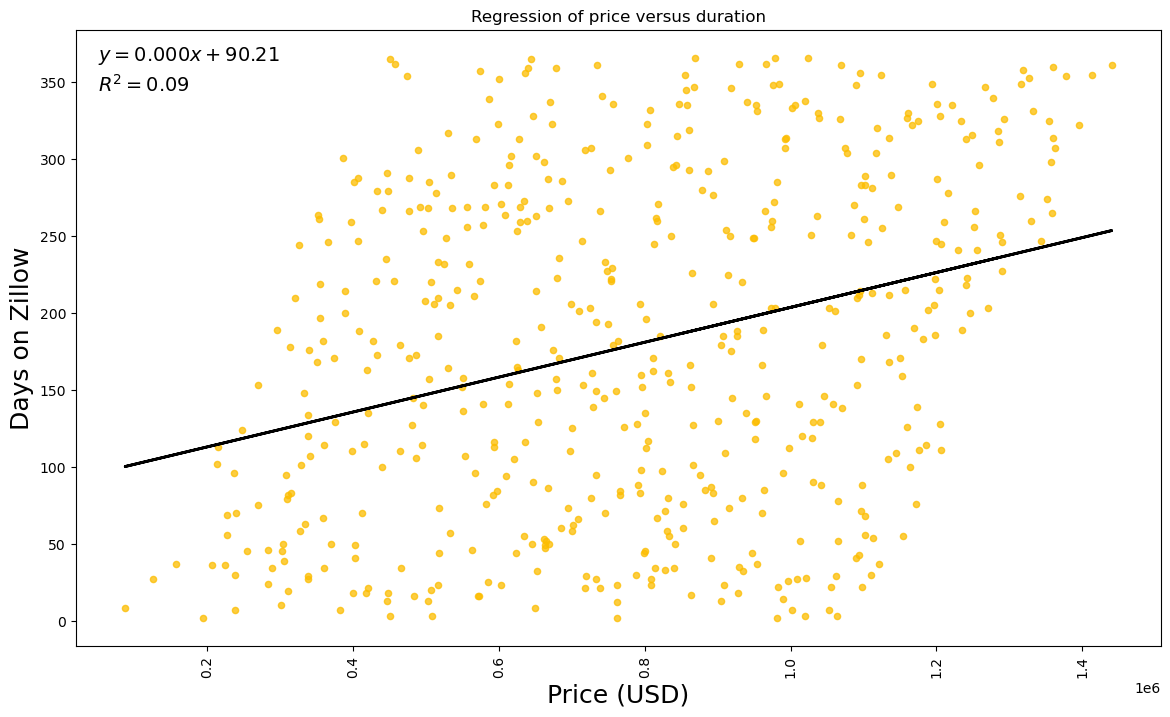

In [28]:
#do similar analysis to week7

import numpy as np
import matplotlib.pyplot as plt

amt = np.array([])
amt2 = np.array([])

plt.figure(figsize=(14,8))

for i in range(0,535):
    amt = np.append(amt, houses[i].price)
    amt2 = np.append(amt2, houses[i].days_on_market)
    
plt.xticks(rotation=90)

# Plot initial scatterplot with axes labeled 
plt.scatter(amt, amt2, s=20, color='#fcbd00', alpha=0.75)

plt.title("Regression of price versus duration")
plt.xlabel("Price (USD)", fontsize=18)
plt.ylabel("Days on Zillow", fontsize=18)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(amt, amt2, 1)
predicted = np.polyval(model, amt)

plt.plot(amt, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(amt, amt2)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()


41 $1954271 262


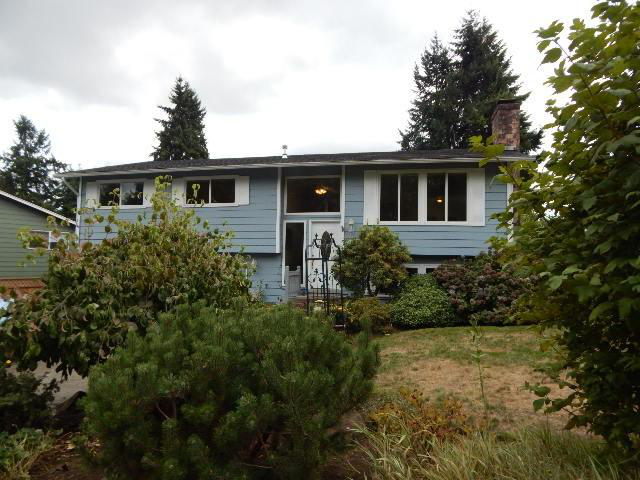

In [32]:
import os
import random
from PIL import Image
import IPython.display as display

class HouseForSale:
    def __init__(self, id, price, days_on_market, image):
        self.id = id
        self.price = price
        self.days_on_market = days_on_market
        self.image = image

    def present(self):
        # Present the house with details
        print(self.id, '$' + str(self.price), self.days_on_market)
        display.display(Image.open(f"{self.id}_frontal.jpg"))
        
houses = []

# Create a database of houses
for i in range(1, 536):
    # Create the BLOB (Binary Large Object)
    file = f"{i}_frontal.jpg"
    location = "houses"
    path = os.path.join(location, file)
    with open(path, 'rb') as f:
        blob = f.read()

    # Generate random values for days on market and price
    dom = random.randint(1, 366)
    p = dom * 1000 + random.randint(80000, 2000000)

    houses.append(HouseForSale(i, p, dom, blob))

houses[40].present()
